## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
#1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>

import numpy as np
#2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>

import matplotlib.pyplot as plt
#3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

import sklearn
#4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
#    - <https://scikit-learn.org/stable/user_guide.html>

## 데이터 내의 결측값들을 제거합니다.

In [2]:
pd.set_option('display.max_columns', None)
# pandas dataframe의 모든 열을 출력하기 위한 설정입니다.

df = pd.read_csv('tox21_dataset.csv')
# 이 주피터파일과 같은 디렉터리에 존재하는 'tox21_dataset.csv' 파일을 읽어와 df에 저장합니다.

df = df.dropna(subset=['NR-AR'])
# 'NR-AR' 열에 결측치가 존재하는 행을 제거합니다.
#   우리가 분석하고자 하는 'NR-AR' 열에 결측치가 존재하는 행은 분석에 방해가 될 수 있기 때문에 제거합니다.
#   결측지까지 제거된 데이터가 제공되었기 때문에 이 과정은 생략해도 됩니다.


df
# 데이터프레임을 출력합니다.
#   주피터 노트북에서는 print() 함수를 사용하지 않아도 마지막 열에 입력된 행을 출력합니다.

,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

In [3]:
X = df.iloc[:, :-1]
# 독립 변수를 X에 저장합니다. 독립 변수는 'NR-AR' 열을 제외한 나머지 열입니다.

y = df.iloc[:, -1]
# 종속 변수를 y에 저장합니다. 종속 변수는 'NR-AR' 열입니다.

## 모델을 생성합니다.

In [4]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 분류 모델을 불러옵니다.


# 로지스틱 회귀 모델 생성
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# 랜덤 포레스트 분류 모델을 생성합니다.
#   n_estimators: 생성할 트리의 개수입니다.
#   max_depth: 트리의 최대 깊이입니다.
#   random_state: 랜덤 시드입니다.

model.fit(X, y)
# 랜덤 포레스트 분류 모델을 학습합니다.

RandomForestClassifier(max_depth=5, random_state=42)



선택한 모델은 random forest classifier입니다. 
- random forest는 decision tree를 여러개 합쳐놓은 것으로, decision tree의 단점인 overfitting을 해결하기 위해 제안되었습니다. random forest의 가장 큰 특징은 변수를 랜덤하게 선택하여 여러개의 decision tree를 만들고, 각 tree의 결과를 종합하여 최종 결과를 도출한다는 점입니다. 이를 통해 overfitting을 방지하고, 높은 정확도를 보장합니다.

## random forest classifier은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수 (지니 불순도)
$$
I_G(t) = 1 - \sum_{i=1}^{c} p(i|t)^2
$$
- random forest classifier는 여러 개의 결정 트리를 생성하여 각 결정 트리의 예측값들을 평균하여 예측합니다. 따라서, 각 결정 트리의 목적함수는 지니 불순도를 사용합니다.

1. n_estimators: 생성할 결정 트리의 개수
2. max_depth: 생성할 결정 트리의 최대 깊이
3. max_features: 각 결정 트리에서 사용할 특성의 최대 개수
4. min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
5. min_samples_leaf: 리프 노드의 최소 샘플 데이터 수
6. max_leaf_nodes: 리프 노드의 최대 개수
7. random_state: 난수 시드

- 위의 하이퍼파라미터들은 모두 트리의 복잡도를 조절하는데 사용됩니다. 자세한 내용은 아래의 링크를 참고하세요.
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## random forest classifier의 시각화

아래는 random forest classifier의 시각화 결과입니다. random forest classifier는 여러 개의 decision tree를 사용하여 데이터를 분류하는 방법입니다. random forest classifier는 여러 개의 decision tree를 사용하기 때문에 각각의 decision tree를 시각화할 수 있습니다. 아래 그림에서 random forest classifier의 첫 번째, 두 번째, 세 번째 decision tree를 확인할 수 있습니다.

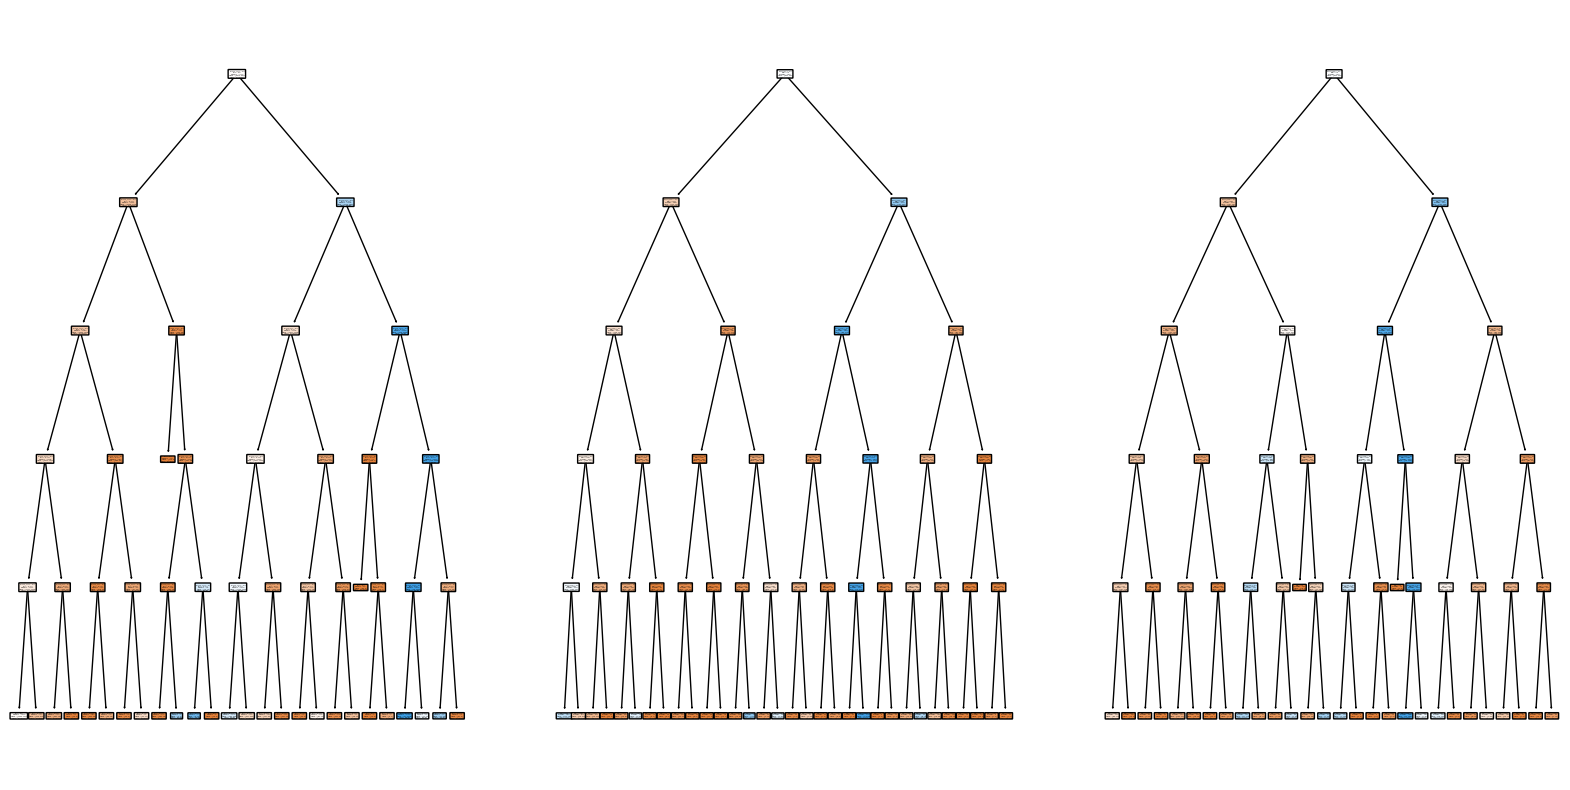

In [5]:
from sklearn.tree import plot_tree
# 트리 시각화를 위한 plot_tree 함수를 불러옵니다.

# 처음 세 개의 트리 시각화
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))  # 플롯 사이즈 조정
for index in range(0, 3):
    # 처음 세 개의 트리를 시각화합니다.
    plot_tree(model.estimators_[index], filled=True, feature_names=X.columns, class_names=["malignant", "benign"], rounded=True, ax=axes[index])
    #   forest.estimators_[index]: 랜덤 포레스트 모델의 index번째 트리를 불러옵니다.
plt.show()
# 시각화한 트리를 출력합니다.

## random forest classifier 특성 중요도

random forest classifier은 각 특성의 중요도를 평가할 수 있습니다. random forest classifier에서의 변수 중요도는 각 결정 트리에서 사용된 모든 분할에 대해 그 분할이 얼마나 예측 성능을 향상시켰는지는 측정해 계산됩니다. 


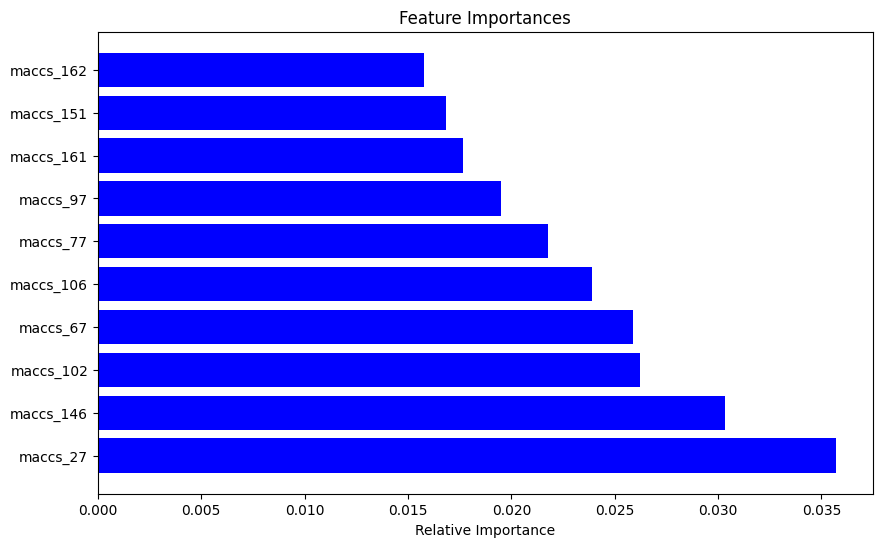

In [6]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 분류 모델을 불러옵니다.
import matplotlib.pyplot as plt
# 시각화를 위한 matplotlib.pyplot을 불러옵니다.
import pandas as pd
# 데이터프레임을 다루기 위한 pandas를 불러옵니다.



# 모델 학습
model = RandomForestClassifier()
# 랜덤 포레스트 분류 모델을 생성합니다.
model.fit(X, y)
# 랜덤 포레스트 분류 모델을 학습합니다.



# 변수 중요도 계산
importances = model.feature_importances_
# 변수 중요도를 계산합니다.
indices = np.argsort(importances)
# 중요도 순으로 정렬합니다.



# 데이터프레임으로 변환
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
# 중요도를 데이터프레임으로 변환합니다.



# 중요도 순으로 정렬하고 상위 10개만 선택
importances_df = importances_df.sort_values('importance', ascending=False).head(10)
# 중요도를 기준으로 내림차순 정렬하고 상위 10개만 선택합니다.



# 시각화
plt.figure(figsize=(10, 6))
# 플롯 사이즈를 조정합니다.
plt.title('Feature Importances')
# 플롯 제목을 추가합니다.
plt.barh(importances_df['feature'], importances_df['importance'], color='b', align='center')
# 막대 그래프를 생성합니다.
plt.xlabel('Relative Importance')
# x축 레이블을 추가합니다.
plt.show()
# 그래프를 출력합니다.

## 결정 경계 시각화

아래는 PCA를 사용하여 피처를 2개로 줄인 후 random forest classifier를 학습한 결과입니다. 결정 경계가 decision tree classifier와 달리 나타납니다. 이는 random forest classifier의 결정경계가 여러 decision tree의 앙상블로 결정되기 때문입니다. 일반적인 경우 random forest classifier은 decision tree classifier에 비해 더 강력한 성능을 보입니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

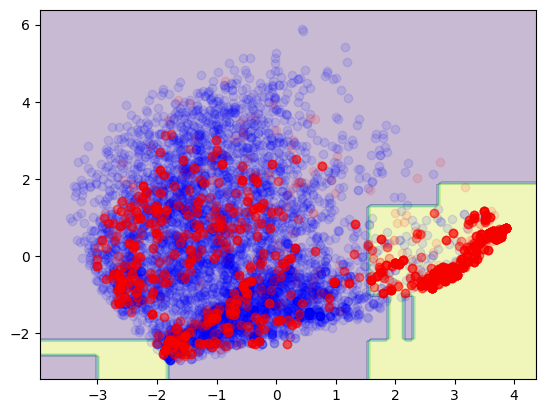

array([[5355,  210],
       [2525, 3040]])

In [7]:
from sklearn.decomposition import PCA
# PCA를 위한 라이브러리를 불러옵니다.
from sklearn.metrics import confusion_matrix
# 혼동 행렬을 계산하기 위한 라이브러리를 불러옵니다.



# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
# 주성분을 2개로 설정합니다.
X_pca = pca.fit_transform(X)
# PCA를 사용하여 피처를 2개로 줄입니다.



# 결정 트리 모델 학습
model_pca = RandomForestClassifier(max_depth=3, random_state=42)
# 랜덤 포레스트 분류 모델을 생성합니다.
model_pca.fit(X_pca, y)
# 랜덤 포레스트 분류 모델을 학습합니다.



# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열
y_pred = model_pca.predict(X_new).reshape(x1.shape)
# y_pred: X_new를 사용하여 예측한 후, x1의 모양으로 변환한 배열



plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.show()
# 시각화를 출력합니다.


confusion_matrix(y, model_pca.predict(X_pca))
# confusion matrix를 출력합니다.

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.

In [8]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[5509,   56],
       [   8, 5557]])


- 5509개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 56개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 8개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 5557개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)
